# GBM - sklearn

- [Online Course](https://www.trainindata.com/p/machine-learning-interpretability)

Here I show a model for regression, but it's the same code, apart from the model, if you want to do classification.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


### Visualize data

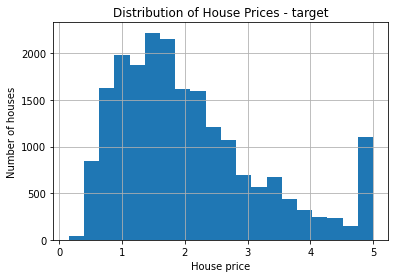

In [3]:
# Display the target distribution

y.hist(bins=20)
plt.xlabel("House price")
plt.ylabel("Number of houses")
plt.title("Distribution of House Prices - target")
plt.show()

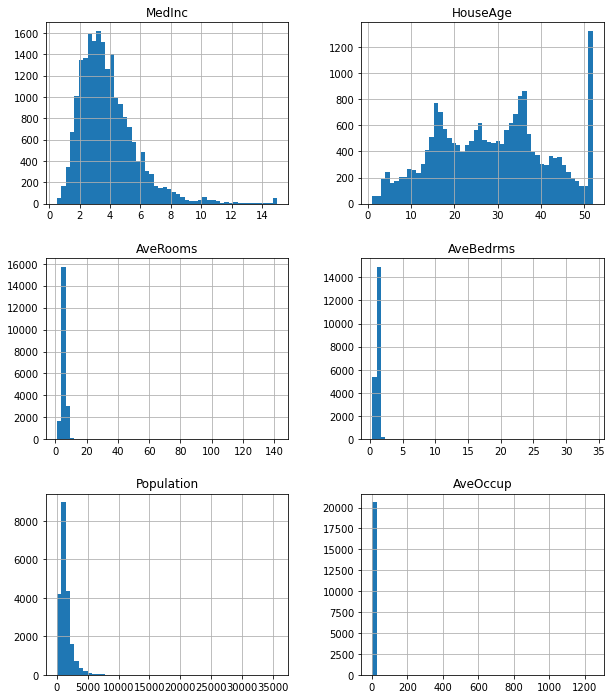

In [4]:
# Display the variables distribution

X.hist(bins=50, figsize=(10, 12))
plt.show()

### Split data

In [5]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## Gradient Boosting Regressor

In [6]:
# fit model

gbm = GradientBoostingRegressor(
    criterion="friedman_mse",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)

gbm.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=3)

In [7]:
# R2 in train set

gbm.score(X_train, y_train)

0.6932457573194972

In [8]:
# R2 in test set

gbm.score(X_test, y_test)

0.6636669200517935

The model explains more than 60% of the variability in the target variable.

## Global explanations - feature importance

In [9]:
# gbm importance

global_exp = pd.Series(gbm.feature_importances_, index=gbm.feature_names_in_)

global_exp

MedInc        0.735441
HouseAge      0.066065
AveRooms      0.038646
AveBedrms     0.006597
Population    0.004464
AveOccup      0.148787
dtype: float64

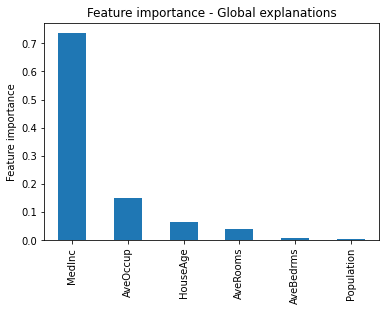

In [10]:
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

MedInc is the most important feature, followed by AveOccup and HouseAge.

If you compare these values with those of random forests or decision trees, you'll see that there are features that feature here, that did not contribute to the other models, like HouseAge if I remember correctly.

Multicolinearity will affect the feature importance returned by the tree.